In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [6]:
df = pd.read_csv('../dataset/OnlineNewsPopularity.csv')
df.columns = df.columns.str.strip()

In [7]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [8]:
# Dataset basic information
print("Filas, columnas:", df.shape)
print("\nColumnas:")
print(df.columns.tolist())
print("\nTipos de datos:")
print(df.dtypes.value_counts())
print("\nValores faltantes:")
print(df.isnull().sum().sum())
print("\nEstadísticas básicas:")
df.describe()

Filas, columnas: (39644, 61)

Columnas:
['url', 'timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words', 'rate_positive_words', 'rate_neg

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


El dataset no tiene valores nulos, no se necesita imputación.

In [9]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width',  None)

print("=== Valores extremos ===")
print("n_unique_tokens > 1:")
print(df[df['n_unique_tokens'] > 1][['url',
'n_unique_tokens', 'n_tokens_content']].head())

print("\n=== Inconsistencias lógicas ===")
print("Artículos con 0 tokens de contenido pero otras métricas:")
zero_content = df[df['n_tokens_content'] == 0]
print(f"Count: {len(zero_content)}")
if len(zero_content) > 0:
    print(zero_content[['url', 'n_tokens_content',
'num_hrefs', 'num_imgs']].head())

print("\n=== DISTRIBUCIONES EXTREMAS ===")
print("Shares > 100k:")
print(f"Count: {len(df[df['shares'] > 100000])}")

print("\nnum_hrefs > 100:")
print(f"Count: {len(df[df['num_hrefs'] > 100])}")

print(f"\nn_unique_tokens range:  {df['n_unique_tokens'].min():.3f} to {df['n_unique_tokens'].max():.3f}")
print(f"Expected range for ratios: 0 to 1")


=== Valores extremos ===
n_unique_tokens > 1:
                                                                    url  \
31037  http://mashable.com/2014/08/18/ukraine-civilian-convoy-attacked/   

       n_unique_tokens  n_tokens_content  
31037            701.0            1570.0  

=== Inconsistencias lógicas ===
Artículos con 0 tokens de contenido pero otras métricas:
Count: 1181
                                                                     url  \
893       http://mashable.com/2013/01/23/actual-facebook-graph-searches/   
917   http://mashable.com/2013/01/23/fitness-gadget-gym-cost-comparison/   
1062          http://mashable.com/2013/01/25/data-vs-nature-infographic/   
1121              http://mashable.com/2013/01/26/infographics-marketing/   
1312                http://mashable.com/2013/01/29/social-tv-chart-1-29/   

      n_tokens_content  num_hrefs  num_imgs  
893                0.0        0.0      10.0  
917                0.0        0.0       0.0  
1062               0

Revisamos esos artículos uno por uno y constatamos que son artículos mal registrados. El que tiene 701 tokens únicos es un artículo normal, es claramente un error de registro. Lo mismo pasa con las páginas con 0 tokens de contenido: todas tienen contenido habitual. 

In [10]:
# Identificar todas las columnas que deberían ser ratios (0-1)
ratio_columns = [
    'n_unique_tokens',           # ratio de tokens únicos
    'n_non_stop_words',          # ratio de palabras no-stop
    'n_non_stop_unique_tokens',  # ratio de tokens únicos no-stop
    'rate_positive_words',       # ratio de palabras positivas
    'rate_negative_words',       # ratio de palabras negativas
    'global_subjectivity',       # subjetividad global
    'global_sentiment_polarity', # polaridad de sentimiento global
    'global_rate_positive_words', # ratio global de palabras positivas
    'global_rate_negative_words', # ratio global de palabras negativas
    'avg_positive_polarity',     # polaridad positiva promedio
    'min_positive_polarity',     # polaridad positiva mínima
    'max_positive_polarity',     # polaridad positiva máxima
    'avg_negative_polarity',     # polaridad negativa promedio
    'min_negative_polarity',     # polaridad negativa mínima
    'max_negative_polarity',     # polaridad negativa máxima
    'title_subjectivity',        # subjetividad del título
    'title_sentiment_polarity',  # polaridad del sentimiento del título
    'abs_title_subjectivity',    # subjetividad absoluta del título
    'abs_title_sentiment_polarity' # polaridad absoluta del sentimiento del título
]

print("=== COLUMNAS CON CORRUPCIÓN DE RATIOS ===")
corrupted_ratios = []

for col in ratio_columns:
    min_val = df[col].min()
    max_val = df[col].max()
    out_of_range = len(df[(df[col] < 0) | (df[col] > 1)])
    
    if out_of_range >= 1:
        corrupted_ratios.append(col)
        print(f"{col}:")
        print(f"  Rango: {min_val:.3f} a {max_val:.3f}")
        print(f"  Fuera de [0,1]: {out_of_range} casos")
        if out_of_range <= 10:
            mask = (df[col] < 0) | (df[col] > 1)
            extreme_values = df.loc[mask, col].values
            print(f"  Valores extremos: {sorted(extreme_values)}")
        else:
            print(f"  Top 5 valores: {df[col].nlargest(5).values}")
        print()

print(f"Total columnas corruptas: {len(corrupted_ratios)}")
print(f"Columnas: {corrupted_ratios}")

=== COLUMNAS CON CORRUPCIÓN DE RATIOS ===
n_unique_tokens:
  Rango: 0.000 a 701.000
  Fuera de [0,1]: 1 casos
  Valores extremos: [np.float64(701.0)]

n_non_stop_words:
  Rango: 0.000 a 1042.000
  Fuera de [0,1]: 1 casos
  Valores extremos: [np.float64(1042.0)]

n_non_stop_unique_tokens:
  Rango: 0.000 a 650.000
  Fuera de [0,1]: 1 casos
  Valores extremos: [np.float64(650.0)]

global_sentiment_polarity:
  Rango: -0.394 a 0.728
  Fuera de [0,1]: 3264 casos
  Top 5 valores: [0.72784091 0.655      0.65       0.63174603 0.625     ]

avg_negative_polarity:
  Rango: -1.000 a 0.000
  Fuera de [0,1]: 37094 casos
  Top 5 valores: [0. 0. 0. 0. 0.]

min_negative_polarity:
  Rango: -1.000 a 0.000
  Fuera de [0,1]: 37094 casos
  Top 5 valores: [0. 0. 0. 0. 0.]

max_negative_polarity:
  Rango: -1.000 a 0.000
  Fuera de [0,1]: 37094 casos
  Top 5 valores: [0. 0. 0. 0. 0.]

title_sentiment_polarity:
  Rango: -1.000 a 1.000
  Fuera de [0,1]: 5786 casos
  Top 5 valores: [1. 1. 1. 1. 1.]

Total columnas

Identificamos que una fila tiene valores absolutos en n_unique_tokens, n_non_stop_words, n_non_stop_unique_tokens, columnas que usan ratios (decimales de 0 a 1). Por lo tanto, decidimos transformarlas al ratio correspondiente.

In [11]:
# Corregir corrupción en ratios de tokens
print("=== CORRECCIÓN DE RATIOS CORRUPTOS ===")

# Identificar la fila corrupta
corrupt_idx = 31037
row = df.iloc[corrupt_idx]

print("Valores antes de la corrección:")
print(f"n_tokens_content: {row['n_tokens_content']}")
print(f"n_unique_tokens: {row['n_unique_tokens']}")
print(f"n_non_stop_words: {row['n_non_stop_words']}")
print(f"n_non_stop_unique_tokens: {row['n_non_stop_unique_tokens']}")

# Calcular ratios correctos
if row['n_tokens_content'] > 0:
    correct_unique_ratio = row['n_unique_tokens'] / row['n_tokens_content']
    correct_non_stop_ratio = row['n_non_stop_words'] / row['n_tokens_content'] 
    correct_non_stop_unique_ratio = row['n_non_stop_unique_tokens'] / row['n_tokens_content']
    
    print(f"\nRatios corregidos:")
    print(f"n_unique_tokens: {correct_unique_ratio:.6f}")
    print(f"n_non_stop_words: {correct_non_stop_ratio:.6f}")
    print(f"n_non_stop_unique_tokens: {correct_non_stop_unique_ratio:.6f}")
    
    # Aplicar correcciones
    df.loc[corrupt_idx, 'n_unique_tokens'] = correct_unique_ratio
    df.loc[corrupt_idx, 'n_non_stop_words'] = correct_non_stop_ratio
    df.loc[corrupt_idx, 'n_non_stop_unique_tokens'] = correct_non_stop_unique_ratio
    
    print(f"\n✓ Ratios corregidos exitosamente")
    
    # Verificar corrección
    print(f"\nVerificación post-corrección:")
    print(f"n_unique_tokens rango: {df['n_unique_tokens'].min():.6f} a {df['n_unique_tokens'].max():.6f}")
    print(f"n_non_stop_words rango: {df['n_non_stop_words'].min():.6f} a {df['n_non_stop_words'].max():.6f}")  
    print(f"n_non_stop_unique_tokens rango: {df['n_non_stop_unique_tokens'].min():.6f} a {df['n_non_stop_unique_tokens'].max():.6f}")
    
else:
    print("Error: no se puede calcular ratio con n_tokens_content = 0")

=== CORRECCIÓN DE RATIOS CORRUPTOS ===
Valores antes de la corrección:
n_tokens_content: 1570.0
n_unique_tokens: 701.0
n_non_stop_words: 1042.0
n_non_stop_unique_tokens: 650.0

Ratios corregidos:
n_unique_tokens: 0.446497
n_non_stop_words: 0.663694
n_non_stop_unique_tokens: 0.414013

✓ Ratios corregidos exitosamente

Verificación post-corrección:
n_unique_tokens rango: 0.000000 a 1.000000
n_non_stop_words rango: 0.000000 a 1.000000
n_non_stop_unique_tokens rango: 0.000000 a 1.000000


In [12]:
# Analizar artículos con 0 tokens de contenido
print("=== ANÁLISIS ARTÍCULOS CON 0 TOKENS ===")

zero_content = df[df['n_tokens_content'] == 0]
print(f"Total artículos con 0 tokens: {len(zero_content)}")
print(f"Porcentaje del dataset: {len(zero_content)/len(df)*100:.2f}%")

print(f"\nCaracterísticas de estos artículos:")
print(f"num_hrefs promedio: {zero_content['num_hrefs'].mean():.2f}")
print(f"num_imgs promedio: {zero_content['num_imgs'].mean():.2f}")
print(f"shares promedio: {zero_content['shares'].mean():.0f}")

print(f"\nDistribución de shares:")
print(zero_content['shares'].describe())

print(f"\nComparación con artículos normales:")
normal_content = df[df['n_tokens_content'] > 0]
print(f"Shares promedio (contenido > 0): {normal_content['shares'].mean():.0f}")
print(f"Shares promedio (contenido = 0): {zero_content['shares'].mean():.0f}")

print(f"\n¿Son artículos válidos para predicción?")
print(f"Artículos 0-contenido con shares > 1000: {len(zero_content[zero_content['shares'] > 1000])}")
print(f"Artículos 0-contenido con imágenes: {len(zero_content[zero_content['num_imgs'] > 0])}")

=== ANÁLISIS ARTÍCULOS CON 0 TOKENS ===
Total artículos con 0 tokens: 1181
Porcentaje del dataset: 2.98%

Características de estos artículos:
num_hrefs promedio: 0.00
num_imgs promedio: 3.93
shares promedio: 4699

Distribución de shares:
count      1181.000000
mean       4698.751058
std       12827.939697
min           4.000000
25%        1000.000000
50%        1600.000000
75%        3800.000000
max      211600.000000
Name: shares, dtype: float64

Comparación con artículos normales:
Shares promedio (contenido > 0): 3355
Shares promedio (contenido = 0): 4699

¿Son artículos válidos para predicción?
Artículos 0-contenido con shares > 1000: 853
Artículos 0-contenido con imágenes: 364


Tenemos un 2.98% de artículos con 0 tokens de contenido. Al ingresar a enlaces aleatoriamente detectamos que se tratan de artículos *con contenido* pero que fueron incorrectamente ingresados con valor 0. Decidimos eliminarlas porque representan un porcentaje poco significativo del total de datos, y no aportan valor por otras variables.

In [13]:
# Eliminar artículos con 0 tokens de contenido
print("=== ELIMINACIÓN DE ARTÍCULOS SIN CONTENIDO ===")

print(f"Dataset original: {len(df)} filas")
zero_content_count = len(df[df['n_tokens_content'] == 0])
print(f"Artículos a eliminar: {zero_content_count}")

# Eliminar filas con contenido = 0
df_clean = df[df['n_tokens_content'] > 0].copy()

print(f"Dataset limpio: {len(df_clean)} filas")
print(f"Filas eliminadas: {len(df) - len(df_clean)}")
print(f"Porcentaje retenido: {len(df_clean)/len(df)*100:.1f}%")

# Verificar eliminación
print(f"\nVerificación:")
print(f"Mínimo n_tokens_content: {df_clean['n_tokens_content'].min()}")
print(f"Artículos con 0 tokens restantes: {len(df_clean[df_clean['n_tokens_content'] == 0])}")

# Actualizar variable principal
df = df_clean
df.head()

=== ELIMINACIÓN DE ARTÍCULOS SIN CONTENIDO ===
Dataset original: 39644 filas
Artículos a eliminar: 1181
Dataset limpio: 38463 filas
Filas eliminadas: 1181
Porcentaje retenido: 97.0%

Verificación:
Mínimo n_tokens_content: 18.0
Artículos con 0 tokens restantes: 0


,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-video-browser/,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-sponsored-tweets/,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billion-app-downloads/,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre-dame-bcs/,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [14]:
# Análisis de outliers extremos
print("=== ANÁLISIS DE OUTLIERS EXTREMOS ===")

# 1. Shares extremas (>100k)
extreme_shares = df[df['shares'] > 100000]
print(f"1. SHARES > 100K:")
print(f"   Cantidad: {len(extreme_shares)}")
print(f"   Rango: {extreme_shares['shares'].min():,} a {extreme_shares['shares'].max():,}")
print(f"   Mediana: {extreme_shares['shares'].median():,}")

# Ver algunas características de artículos virales
print(f"\n   Características de artículos virales:")
print(f"   n_tokens_content promedio: {extreme_shares['n_tokens_content'].mean():.0f}")
print(f"   num_hrefs promedio: {extreme_shares['num_hrefs'].mean():.1f}")
print(f"   num_imgs promedio: {extreme_shares['num_imgs'].mean():.1f}")

# 2. hrefs extremos (>100)
extreme_hrefs = df[df['num_hrefs'] > 100]
print(f"\n2. HREFS > 100:")
print(f"   Cantidad: {len(extreme_hrefs)}")
print(f"   Rango: {extreme_hrefs['num_hrefs'].min()} a {extreme_hrefs['num_hrefs'].max()}")
print(f"   Shares promedio: {extreme_hrefs['shares'].mean():,.0f}")

print(f"\n   Características de artículos con muchos links:")
print(f"   n_tokens_content promedio: {extreme_hrefs['n_tokens_content'].mean():.0f}")
print(f"   shares vs normal: {extreme_hrefs['shares'].mean():.0f} vs {df['shares'].mean():.0f}")

# 3. Distribuciones generales usando IQR
print(f"\n3. ANÁLISIS IQR PARA THRESHOLDS:")

for col in ['shares', 'num_hrefs']:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    outliers = len(df[(df[col] < lower_bound) | (df[col] > upper_bound)])
    
    print(f"\n   {col}:")
    print(f"   Q1: {q1:.0f}, Q3: {q3:.0f}, IQR: {iqr:.0f}")
    print(f"   Threshold superior: {upper_bound:.0f}")
    print(f"   Outliers (IQR): {outliers} casos")
    print(f"   Max valor: {df[col].max():.0f}")

=== ANÁLISIS DE OUTLIERS EXTREMOS ===
1. SHARES > 100K:
   Cantidad: 52
   Rango: 100,300 a 843,300
   Mediana: 139,550.0

   Características de artículos virales:
   n_tokens_content promedio: 608
   num_hrefs promedio: 16.0
   num_imgs promedio: 6.9

2. HREFS > 100:
   Cantidad: 51
   Rango: 101.0 a 304.0
   Shares promedio: 7,488

   Características de artículos con muchos links:
   n_tokens_content promedio: 1804
   shares vs normal: 7488 vs 3355

3. ANÁLISIS IQR PARA THRESHOLDS:

   shares:
   Q1: 945, Q3: 2700, IQR: 1755
   Threshold superior: 5332
   Outliers (IQR): 4523 casos
   Max valor: 843300

   num_hrefs:
   Q1: 5, Q3: 14, IQR: 9
   Threshold superior: 28
   Outliers (IQR): 2636 casos
   Max valor: 304


Se observan valores razonables, propios de contenido viral. Se decide no eliminar ni transformar ningún dato.

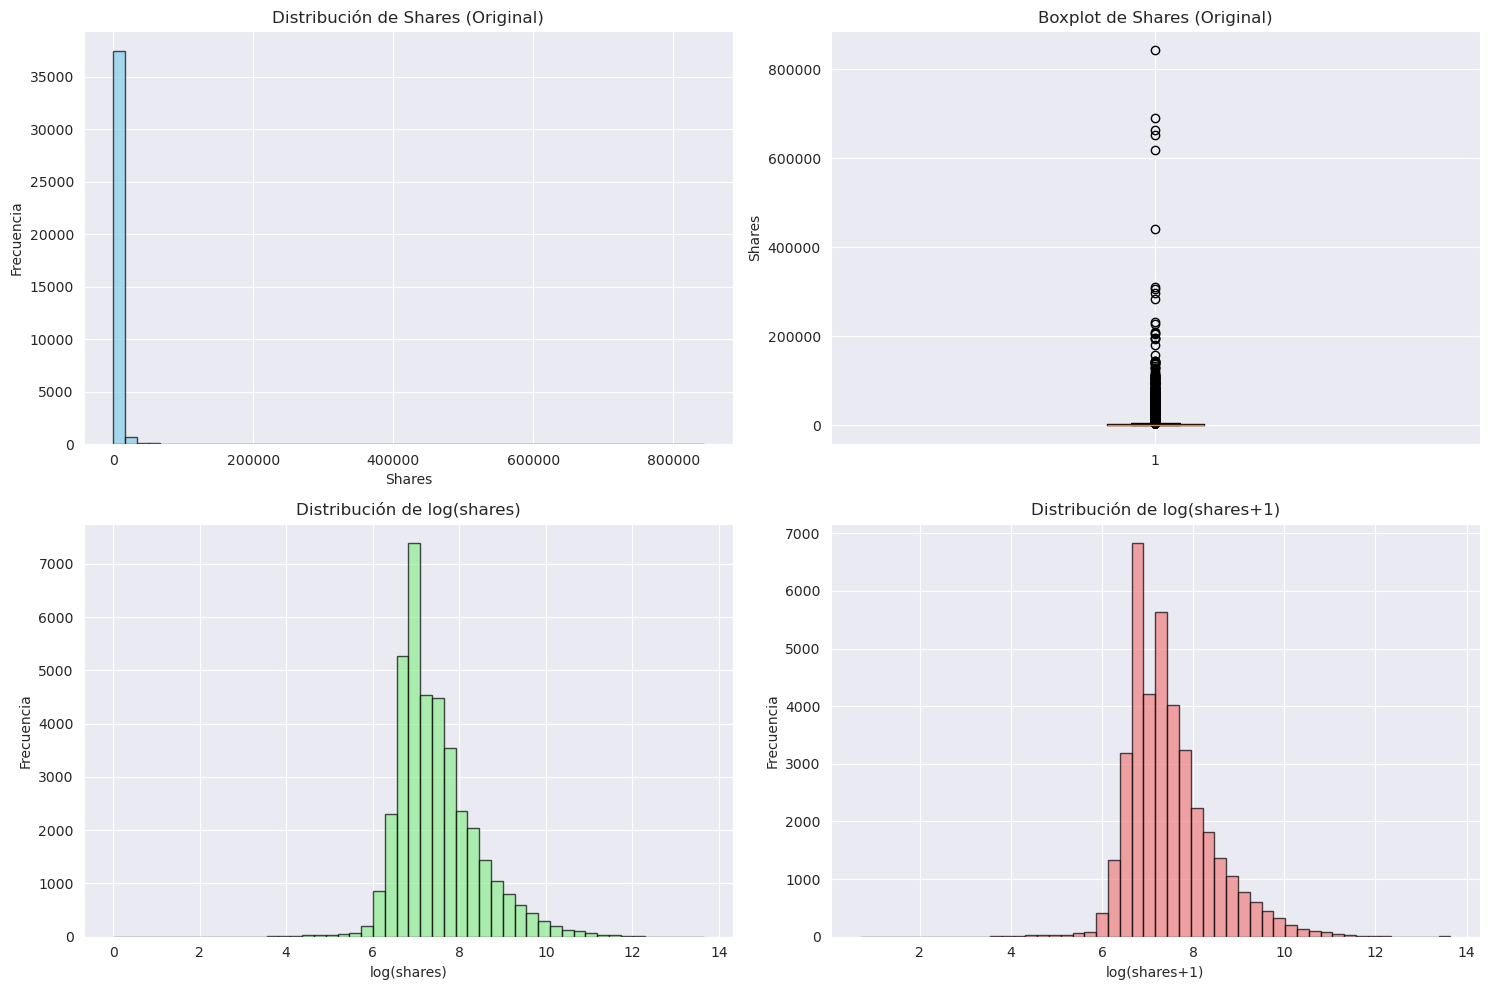

=== ESTADÍSTICAS DE DISTRIBUCIÓN ===
Shares originales:
  Media: 3,355
  Mediana: 1,400
  Desviación estándar: 11,586
  Skewness: 34.95

log(shares):
  Media: 7.47
  Mediana: 7.24
  Desviación estándar: 0.93
  Skewness: 1.02

log(shares+1):
  Media: 7.47
  Mediana: 7.24
  Desviación estándar: 0.92
  Skewness: 1.03


In [15]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

axes[0, 0].hist(df['shares'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribución de Shares (Original)')
axes[0, 0].set_xlabel('Shares')
axes[0, 0].set_ylabel('Frecuencia')

axes[0, 1].boxplot(df['shares'])
axes[0, 1].set_title('Boxplot de Shares (Original)')
axes[0, 1].set_ylabel('Shares')

shares_log = np.log(df['shares'])
axes[1, 0].hist(shares_log, bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
axes[1, 0].set_title('Distribución de log(shares)')
axes[1, 0].set_xlabel('log(shares)')
axes[1, 0].set_ylabel('Frecuencia')

shares_log1p = np.log1p(df['shares'])
axes[1, 1].hist(shares_log1p, bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
axes[1, 1].set_title('Distribución de log(shares+1)')
axes[1, 1].set_xlabel('log(shares+1)')
axes[1, 1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

print("=== ESTADÍSTICAS DE DISTRIBUCIÓN ===")
print(f"Shares originales:")
print(f"  Media: {df['shares'].mean():,.0f}")
print(f"  Mediana: {df['shares'].median():,.0f}")
print(f"  Desviación estándar: {df['shares'].std():,.0f}")
print(f"  Skewness: {df['shares'].skew():.2f}")

print(f"\nlog(shares):")
print(f"  Media: {shares_log.mean():.2f}")
print(f"  Mediana: {shares_log.median():.2f}")
print(f"  Desviación estándar: {shares_log.std():.2f}")
print(f"  Skewness: {shares_log.skew():.2f}")

print(f"\nlog(shares+1):")
print(f"  Media: {shares_log1p.mean():.2f}")
print(f"  Mediana: {shares_log1p.median():.2f}")
print(f"  Desviación estándar: {shares_log1p.std():.2f}")
print(f"  Skewness: {shares_log1p.skew():.2f}")

=== ANÁLISIS DE PERCENTILES ===
P10: 708 shares
P25: 945 shares
P50: 1,400 shares
P75: 2,700 shares
P90: 6,100 shares
P95: 10,700 shares
P99: 31,500 shares

=== PROPUESTA DE CLASIFICACIÓN ===
Criterios de popularidad:
Bajo: ≤ 1,000 shares
Medio: 1,001 - 3,000 shares
Alto: 3,001 - 10,000 shares
Viral: > 10,000 shares

=== DISTRIBUCIÓN POR TIER ===
Bajo: 12,096 artículos (31.4%) - Promedio: 772 shares
Medio: 17,798 artículos (46.3%) - Promedio: 1,713 shares
Alto: 6,491 artículos (16.9%) - Promedio: 5,188 shares
Viral: 2,078 artículos (5.4%) - Promedio: 26,734 shares


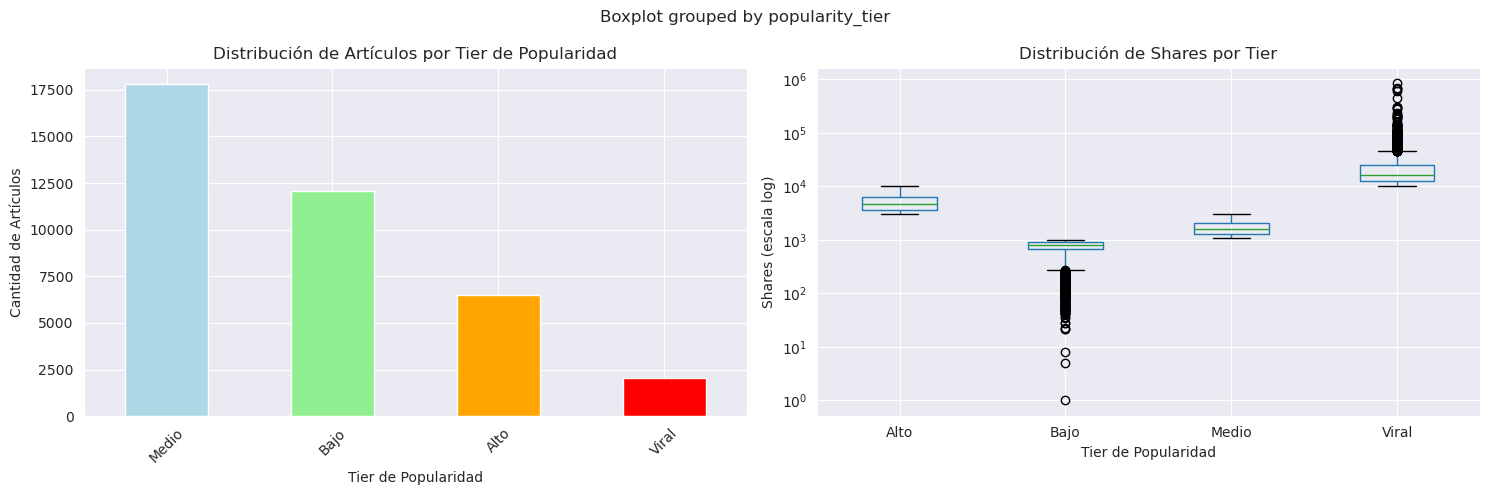

In [16]:
percentiles = [10, 25, 50, 75, 90, 95, 99]
values = [df['shares'].quantile(p/100) for p in percentiles]

print("=== ANÁLISIS DE PERCENTILES ===")
for p, v in zip(percentiles, values):
    print(f"P{p}: {v:,.0f} shares")

print(f"\n=== PROPUESTA DE CLASIFICACIÓN ===")
breakpoints = [1000, 3000, 10000]
labels = ['Bajo', 'Medio', 'Alto', 'Viral']

print("Criterios de popularidad:")
for i, (label, bp) in enumerate(zip(labels[:-1], breakpoints)):
    if i == 0:
        print(f"{label}: ≤ {bp:,} shares")
    else:
        print(f"{label}: {breakpoints[i-1]+1:,} - {bp:,} shares")
print(f"{labels[-1]}: > {breakpoints[-1]:,} shares")

def classify_popularity(shares):
    if shares <= breakpoints[0]:
        return labels[0]
    elif shares <= breakpoints[1]:
        return labels[1]
    elif shares <= breakpoints[2]:
        return labels[2]
    else:
        return labels[3]

df['popularity_tier'] = df['shares'].apply(classify_popularity)

print(f"\n=== DISTRIBUCIÓN POR TIER ===")
tier_counts = df['popularity_tier'].value_counts()
for tier in labels:
    count = tier_counts.get(tier, 0)
    pct = count / len(df) * 100
    avg_shares = df[df['popularity_tier'] == tier]['shares'].mean()
    print(f"{tier}: {count:,} artículos ({pct:.1f}%) - Promedio: {avg_shares:,.0f} shares")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

tier_counts.plot(kind='bar', ax=ax1, color=['lightblue', 'lightgreen', 'orange', 'red'])
ax1.set_title('Distribución de Artículos por Tier de Popularidad')
ax1.set_xlabel('Tier de Popularidad')
ax1.set_ylabel('Cantidad de Artículos')
ax1.tick_params(axis='x', rotation=45)

df.boxplot(column='shares', by='popularity_tier', ax=ax2)
ax2.set_title('Distribución de Shares por Tier')
ax2.set_xlabel('Tier de Popularidad')
ax2.set_ylabel('Shares (escala log)')
ax2.set_yscale('log')

plt.tight_layout()
plt.show()

# Selección de Variables

In [17]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols.remove('shares')

correlations = df[numeric_cols].corrwith(df['shares']).sort_values(ascending=False)

print("=== TOP CORRELACIONES CON SHARES ===")
print("Correlaciones positivas más fuertes:")
positive_corrs = correlations[correlations > 0.05]
for feature, corr in positive_corrs.head(10).items():
    print(f"{feature:35}: {corr:.3f}")

print(f"\nCorrelaciones negativas más fuertes:")
negative_corrs = correlations[correlations < -0.05]
for feature, corr in negative_corrs.head(10).items():
    print(f"{feature:35}: {corr:.3f}")

print(f"\n=== RESUMEN ESTADÍSTICO ===")
print(f"Total features analizadas: {len(correlations)}")
print(f"Correlaciones > 0.1: {len(correlations[correlations > 0.1])}")
print(f"Correlaciones < -0.1: {len(correlations[correlations < -0.1])}")
print(f"Correlaciones significativas (|r| > 0.1): {len(correlations[abs(correlations) > 0.1])}")

significant_features = correlations[abs(correlations) > 0.05].index.tolist()
print(f"Features con correlación |r| > 0.05: {len(significant_features)}")

top_features = correlations[abs(correlations) > 0.1]
print(f"\n=== TOP FEATURES PARA MODELADO (|r| > 0.1) ===")
for feature, corr in top_features.items():
    print(f"{feature:35}: {corr:.3f}")

=== TOP CORRELACIONES CON SHARES ===
Correlaciones positivas más fuertes:
kw_avg_avg                         : 0.109
LDA_03                             : 0.081
kw_max_avg                         : 0.064
global_subjectivity                : 0.061
self_reference_avg_sharess         : 0.060
self_reference_min_shares          : 0.058
num_hrefs                          : 0.050

Correlaciones negativas más fuertes:
LDA_02                             : -0.059

=== RESUMEN ESTADÍSTICO ===
Total features analizadas: 59
Correlaciones > 0.1: 1
Correlaciones < -0.1: 0
Correlaciones significativas (|r| > 0.1): 1
Features con correlación |r| > 0.05: 8

=== TOP FEATURES PARA MODELADO (|r| > 0.1) ===
kw_avg_avg                         : 0.109


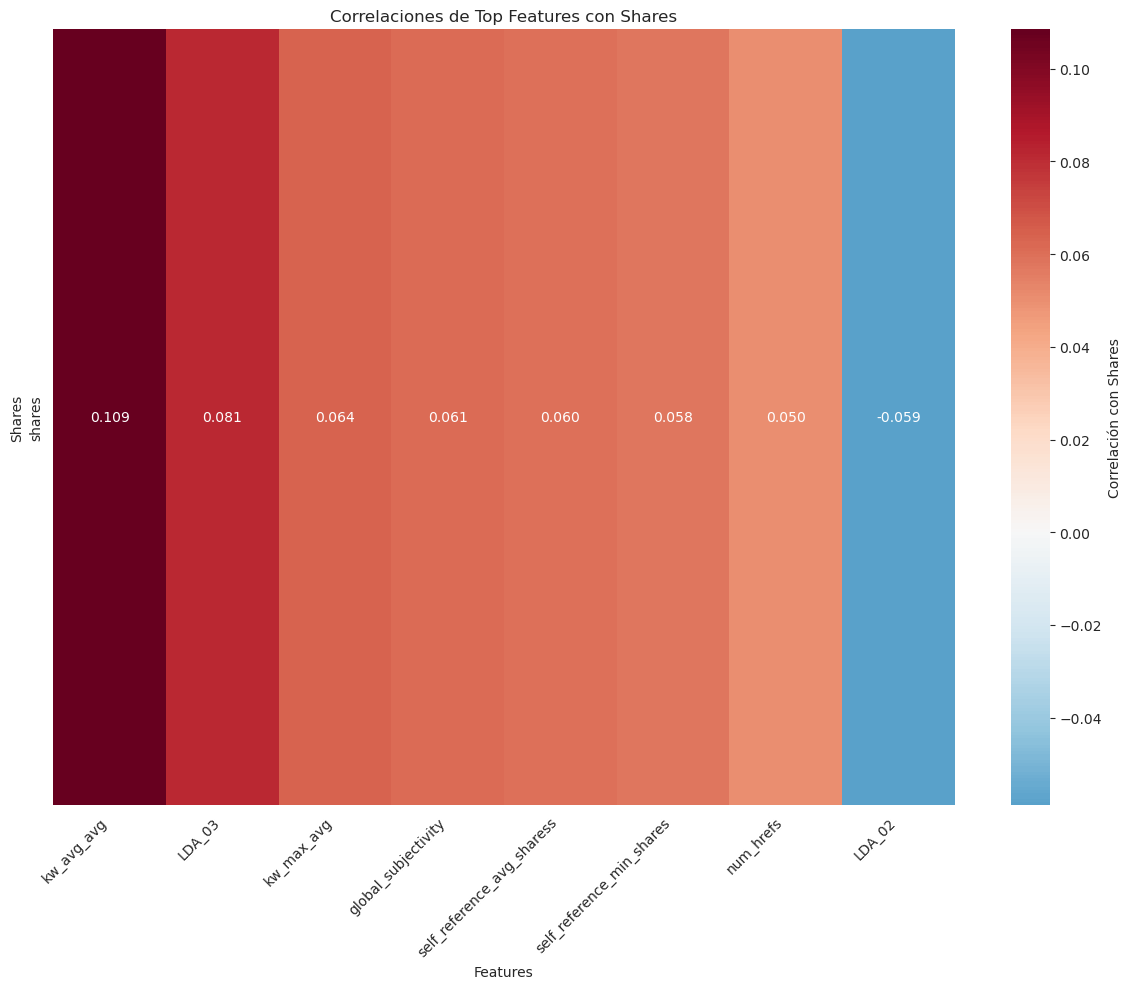

=== ANÁLISIS POR CATEGORÍAS ===

Contenido:
  num_hrefs                     : 0.050
  num_imgs                      : 0.041
  num_videos                    : 0.025

Keywords:
  kw_avg_avg                    : 0.109
  kw_max_avg                    : 0.064
  kw_avg_max                    : 0.040

Auto-referencia:
  self_reference_avg_sharess    : 0.060
  self_reference_min_shares     : 0.058
  self_reference_max_shares     : 0.049

Sentimiento:
  title_sentiment_polarity      : 0.012
  global_sentiment_polarity     : 0.009
  rate_positive_words           : -0.001

Temporales:
  is_weekend                    : 0.017
  timedelta                     : 0.014

Tópicos:
  LDA_03                        : 0.081
  LDA_02                        : -0.059
  LDA_04                        : -0.015


In [18]:
selected_features = correlations[abs(correlations) > 0.05].index.tolist()[:15]
correlation_matrix = df[selected_features + ['shares']].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix.iloc[-1:, :-1], 
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            fmt='.3f',
            cbar_kws={'label': 'Correlación con Shares'})
plt.title('Correlaciones de Top Features con Shares')
plt.xlabel('Features')
plt.ylabel('Shares')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

feature_categories = {
    'Contenido': ['n_tokens_content', 'n_tokens_title', 'num_hrefs', 'num_imgs', 'num_videos'],
    'Keywords': ['kw_avg_avg', 'kw_max_avg', 'kw_avg_max', 'num_keywords'],
    'Auto-referencia': ['self_reference_avg_sharess', 'self_reference_max_shares', 'self_reference_min_shares'],
    'Sentimiento': ['global_sentiment_polarity', 'title_sentiment_polarity', 'rate_positive_words'],
    'Temporales': ['timedelta', 'is_weekend'],
    'Tópicos': ['LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04']
}

print("=== ANÁLISIS POR CATEGORÍAS ===")
for category, features in feature_categories.items():
    category_corrs = []
    for feature in features:
        if feature in correlations.index:
            category_corrs.append((feature, correlations[feature]))
    
    if category_corrs:
        category_corrs.sort(key=lambda x: abs(x[1]), reverse=True)
        print(f"\n{category}:")
        for feature, corr in category_corrs[:3]:
            print(f"  {feature:30}: {corr:.3f}")

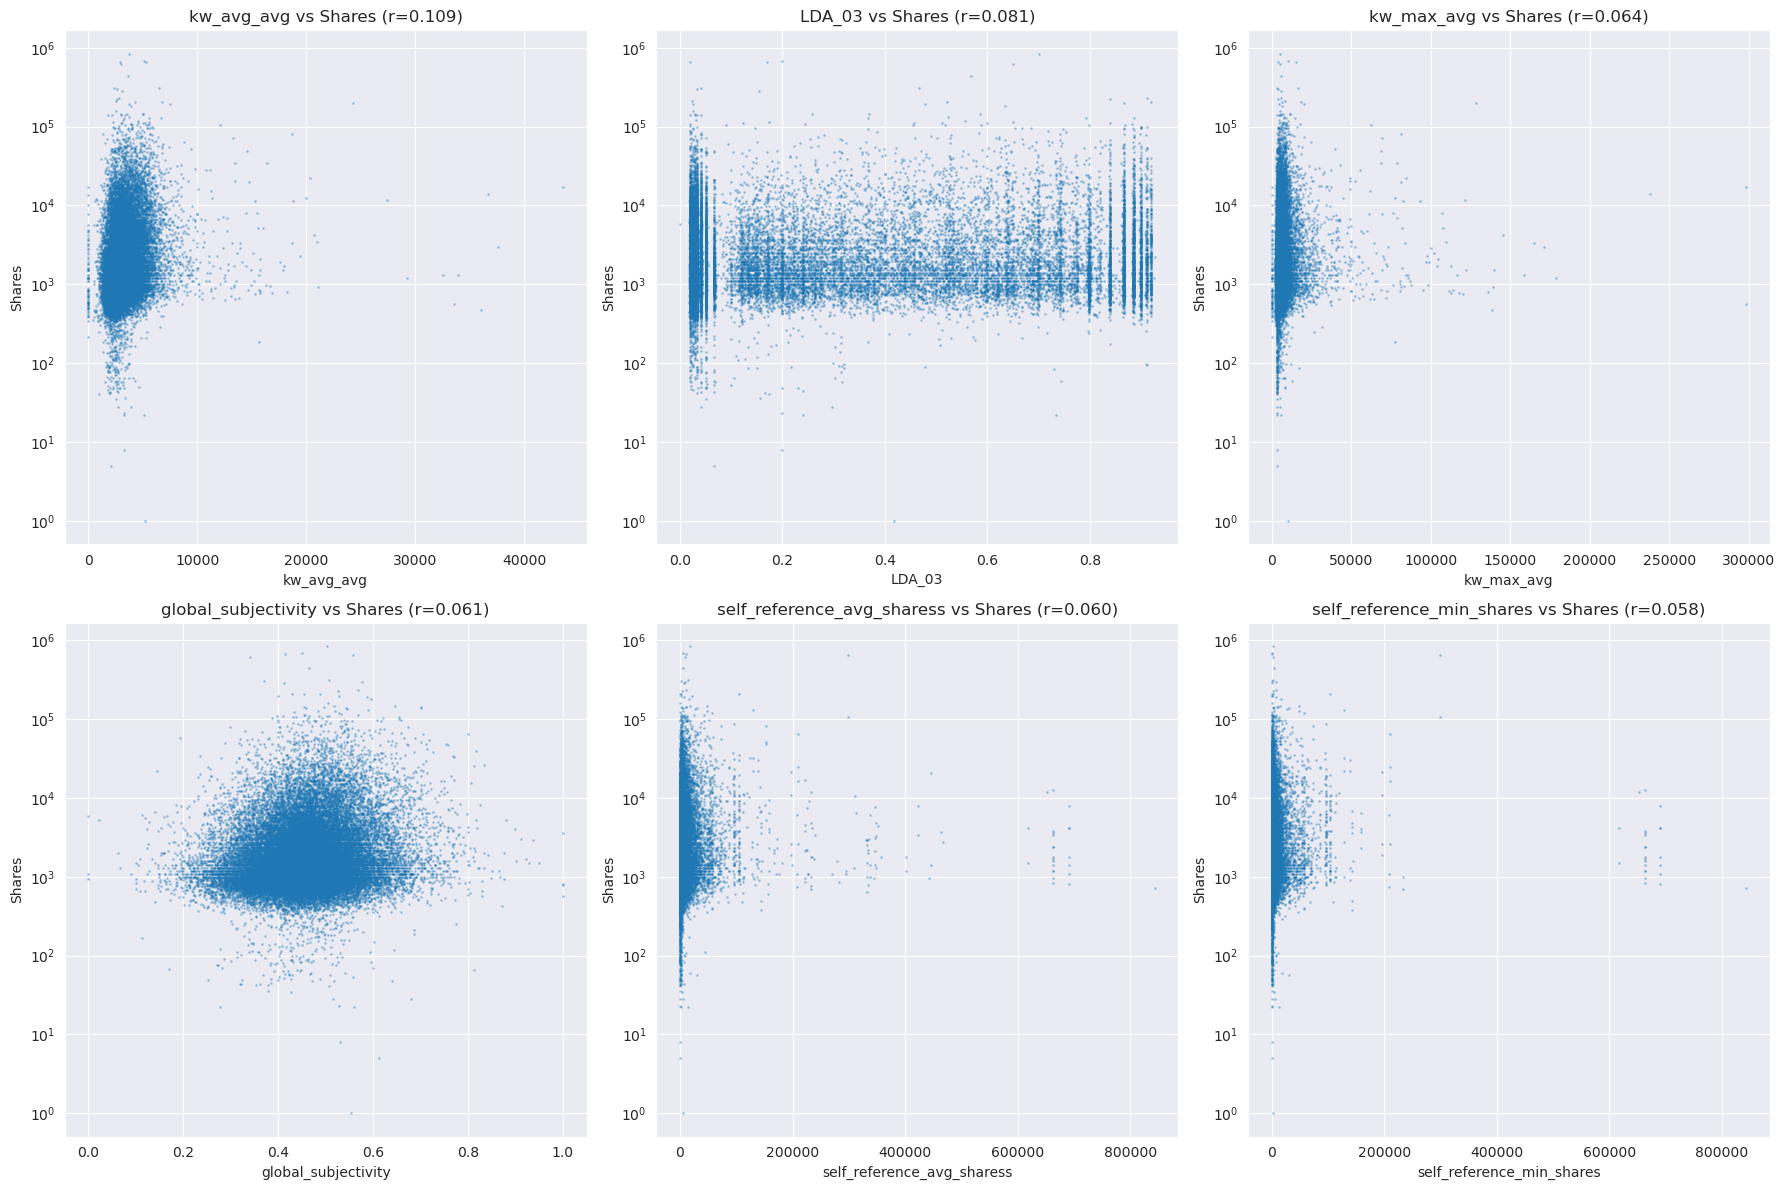

=== ANÁLISIS DE RELACIONES NO-LINEALES ===
kw_avg_avg                    : Original r=0.109, Log r=0.221
LDA_03                        : Original r=0.081, Log r=0.124
kw_max_avg                    : Original r=0.064, Log r=0.108
global_subjectivity           : Original r=0.061, Log r=0.134
self_reference_avg_sharess    : Original r=0.060, Log r=0.091
self_reference_min_shares     : Original r=0.058, Log r=0.076

=== RECOMENDACIONES PARA TRANSFORMACIONES ===
Features que mejoran con log(shares):
  kw_avg_avg: 0.109 → 0.221
  LDA_03: 0.081 → 0.124
  kw_max_avg: 0.064 → 0.108
  global_subjectivity: 0.061 → 0.134
  self_reference_avg_sharess: 0.060 → 0.091


In [19]:
top_features_plot = correlations[abs(correlations) > 0.05].head(6).index.tolist()

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, feature in enumerate(top_features_plot):
    axes[i].scatter(df[feature], df['shares'], alpha=0.3, s=1)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Shares')
    axes[i].set_title(f'{feature} vs Shares (r={correlations[feature]:.3f})')
    axes[i].set_yscale('log')

plt.tight_layout()
plt.show()

print("=== ANÁLISIS DE RELACIONES NO-LINEALES ===")
for feature in top_features_plot:
    log_corr = df[feature].corr(np.log(df['shares']))
    orig_corr = correlations[feature]
    print(f"{feature:30}: Original r={orig_corr:.3f}, Log r={log_corr:.3f}")
    
print(f"\n=== RECOMENDACIONES PARA TRANSFORMACIONES ===")
print("Features que mejoran con log(shares):")
for feature in top_features_plot:
    log_corr = df[feature].corr(np.log(df['shares']))
    orig_corr = correlations[feature]
    if abs(log_corr) > abs(orig_corr) + 0.02:
        print(f"  {feature}: {orig_corr:.3f} → {log_corr:.3f}")

In [20]:
print("=== SELECCIÓN FINAL DE FEATURES PARA MODELADO ===")

tier1_features = correlations[abs(correlations) > 0.1].index.tolist()
tier2_features = correlations[(abs(correlations) > 0.05) & (abs(correlations) <= 0.1)].index.tolist()

print(f"TIER 1 - Correlación fuerte (|r| > 0.1):")
for i, feature in enumerate(tier1_features, 1):
    print(f"{i:2d}. {feature:35} (r={correlations[feature]:6.3f})")

print(f"\nTIER 2 - Correlación moderada (0.05 < |r| ≤ 0.1):")
for i, feature in enumerate(tier2_features, 1):
    print(f"{i:2d}. {feature:35} (r={correlations[feature]:6.3f})")

print(f"\n=== RECOMENDACIONES PARA MODELADO ===")
print(f"✓ Usar TIER 1 como features principales ({len(tier1_features)} features)")
print(f"✓ Considerar TIER 2 como features secundarias ({len(tier2_features)} features)")
print(f"✓ Aplicar log-transform a target variable (shares)")
print(f"✓ Total features recomendadas: {len(tier1_features) + len(tier2_features)}")

selected_modeling_features = tier1_features + tier2_features[:10]
print(f"\n=== FEATURE SET FINAL PROPUESTO ===")
print(f"Total features seleccionadas: {len(selected_modeling_features)}")
print("Features:")
for i, feature in enumerate(selected_modeling_features, 1):
    corr_val = correlations[feature]
    tier = "T1" if abs(corr_val) > 0.1 else "T2"
    print(f"{i:2d}. [{tier}] {feature:35} (r={corr_val:6.3f})")

print(f"\n=== FEATURES DESCARTADAS ===")
weak_features = correlations[abs(correlations) <= 0.05]
print(f"Features con correlación débil (|r| ≤ 0.05): {len(weak_features)}")
print("Ejemplos de features descartadas:")
for feature in weak_features.head(5).index:
    print(f"  {feature:35} (r={weak_features[feature]:6.3f})")

=== SELECCIÓN FINAL DE FEATURES PARA MODELADO ===
TIER 1 - Correlación fuerte (|r| > 0.1):
 1. kw_avg_avg                          (r= 0.109)

TIER 2 - Correlación moderada (0.05 < |r| ≤ 0.1):
 1. LDA_03                              (r= 0.081)
 2. kw_max_avg                          (r= 0.064)
 3. global_subjectivity                 (r= 0.061)
 4. self_reference_avg_sharess          (r= 0.060)
 5. self_reference_min_shares           (r= 0.058)
 6. num_hrefs                           (r= 0.050)
 7. LDA_02                              (r=-0.059)

=== RECOMENDACIONES PARA MODELADO ===
✓ Usar TIER 1 como features principales (1 features)
✓ Considerar TIER 2 como features secundarias (7 features)
✓ Aplicar log-transform a target variable (shares)
✓ Total features recomendadas: 8

=== FEATURE SET FINAL PROPUESTO ===
Total features seleccionadas: 8
Features:
 1. [T1] kw_avg_avg                          (r= 0.109)
 2. [T2] LDA_03                              (r= 0.081)
 3. [T2] kw_max_avg     